In [1]:
import scipy as scipy
import scipy.cluster as scipycluster
import nibabel as nib
import nibabel.gifti
import nilearn
from nilearn import datasets, plotting
import sys
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as plt
from matplotlib.colors import ListedColormap
mpl.rcParams['svg.fonttype'] = 'none'
import sys
sys.path.append('gradient_data/src/')
from PIL import Image

/om/user/xaviergp/env/xavier_env/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
GRADIENT1 = nib.load('singles_result_cerebellumonly_gradient1_smooth4.dscalar.nii').get_data()
GRADIENT1 = GRADIENT1[0]
GRADIENT2 = nib.load('singles_result_cerebellumonly_gradient2_smooth4.dscalar.nii').get_data()
GRADIENT2 = GRADIENT2[0]

In [6]:
# Generate matrix of each area of representation with either 1 or 0
SUITatlas = nib.load('/om/project/UCT1/GRADIENTPROJECT/GRADIENT_PROJECT/python_notebooks_final/cerebellumgradient_initialfiles/SUITatlas_singlesubject.dscalar.nii').get_data()

Left_I_IV = ((SUITatlas == 1).astype(int))[0]
Right_I_IV = ((SUITatlas == 2).astype(int))[0]
Left_V = ((SUITatlas == 3).astype(int))[0]
Right_V = ((SUITatlas == 4).astype(int))[0]
Left_VI = ((SUITatlas == 5).astype(int))[0]
Vermis_VI = ((SUITatlas == 6).astype(int))[0]
Right_VI = ((SUITatlas == 7).astype(int))[0]
Left_CrusI = ((SUITatlas == 8).astype(int))[0]
Vermis_CrusI = ((SUITatlas == 9).astype(int))[0]
Right_CrusI = ((SUITatlas == 10).astype(int))[0]
Left_CrusII = ((SUITatlas == 11).astype(int))[0]
Vermis_CrusII = ((SUITatlas == 12).astype(int))[0]
Right_CrusII = ((SUITatlas == 13).astype(int))[0]
Left_VIIb = ((SUITatlas == 14).astype(int))[0]
Vermis_VIIb = ((SUITatlas == 15).astype(int))[0]
Right_VIIb = ((SUITatlas == 16).astype(int))[0]
Left_VIIIa = ((SUITatlas == 17).astype(int))[0]
Vermis_VIIIa = ((SUITatlas == 18).astype(int))[0]
Right_VIIIa = ((SUITatlas == 19).astype(int))[0]
Left_VIIIb = ((SUITatlas == 20).astype(int))[0]
Vermis_VIIIb = ((SUITatlas == 21).astype(int))[0]
Right_VIIIb = ((SUITatlas == 22).astype(int))[0]
Left_IX = ((SUITatlas == 23).astype(int))[0]
Vermis_IX = ((SUITatlas == 24).astype(int))[0]
Right_IX = ((SUITatlas == 25).astype(int))[0]
Left_X = ((SUITatlas == 26).astype(int))[0]
Vermis_X = ((SUITatlas == 27).astype(int))[0]
Right_X = ((SUITatlas == 28).astype(int))[0]

In [7]:
GRADIENT2_FIRSTREP_R = GRADIENT2 * (Right_VI + Right_CrusI)
GRADIENT2_SECONDREP_R = GRADIENT2 * (Right_CrusI + Right_VIIb)
GRADIENT2_THIRDREP_R = GRADIENT2 * (Right_IX + Right_X)
GRADIENT1_THIRDREP_R = GRADIENT1 * (Right_IX + Right_X)
GRADIENT1_FIRSTANDSECONDREP_R = GRADIENT1 * (Right_VI + Right_CrusI + Right_CrusII + Right_VIIb) 
GRADIENT1_FIRSTREP_INVERSE_R = (GRADIENT1 * -1) * (Right_I_IV + Right_VI)
GRADIENT1_SECONDREP_INVERSE_R = (GRADIENT1 * -1) * (Right_VIIIa + Right_VIIIb)
GRADIENT2_FIRSTREP_L = GRADIENT2 * (Left_VI + Left_CrusI)
GRADIENT2_SECONDREP_L = GRADIENT2 * (Left_CrusI + Left_VIIb)
GRADIENT2_THIRDREP_L = GRADIENT2 * (Left_IX + Left_X)
GRADIENT1_THIRDREP_L = GRADIENT1 * (Left_IX + Left_X)
GRADIENT1_FIRSTANDSECONDREP_L = GRADIENT1 * (Left_VI + Left_CrusI + Left_CrusII + Left_VIIb)
GRADIENT1_FIRSTREP_INVERSE_L = (GRADIENT1 * -1) * (Left_I_IV)
GRADIENT1_SECONDREP_INVERSE_L = (GRADIENT1 * -1) * (Left_VIIIa + Left_VIIIb)

In [9]:
threshold = 95

GRADIENT2_FIRSTREP_R[GRADIENT2_FIRSTREP_R == 0] = np.nan
GRADIENT2_SECONDREP_R[GRADIENT2_SECONDREP_R == 0] = np.nan
GRADIENT2_THIRDREP_R[GRADIENT2_THIRDREP_R == 0] = np.nan
GRADIENT1_THIRDREP_R[GRADIENT1_THIRDREP_R == 0] = np.nan
GRADIENT1_FIRSTANDSECONDREP_R[GRADIENT1_FIRSTANDSECONDREP_R == 0] = np.nan
GRADIENT1_FIRSTREP_INVERSE_R[GRADIENT1_FIRSTREP_INVERSE_R == 0] = np.nan
GRADIENT1_SECONDREP_INVERSE_R[GRADIENT1_SECONDREP_INVERSE_R == 0] = np.nan
GRADIENT2_FIRSTREP_L[GRADIENT2_FIRSTREP_L == 0] = np.nan
GRADIENT2_SECONDREP_L[GRADIENT2_SECONDREP_L == 0] = np.nan
GRADIENT2_THIRDREP_L[GRADIENT2_THIRDREP_L == 0] = np.nan
GRADIENT1_THIRDREP_L[GRADIENT1_THIRDREP_L == 0] = np.nan
GRADIENT1_FIRSTANDSECONDREP_L[GRADIENT1_FIRSTANDSECONDREP_L == 0] = np.nan
GRADIENT1_FIRSTREP_INVERSE_L[GRADIENT1_FIRSTREP_INVERSE_L == 0] = np.nan
GRADIENT1_SECONDREP_INVERSE_L[GRADIENT1_SECONDREP_INVERSE_L == 0] = np.nan
### Make them have nans so that percentile is only calculated on the data, 
### and each lobule has a percentage proportional to the size of that lobule

GRADIENT2_FIRSTREP_THRESHOLD_R = np.nanpercentile(GRADIENT2_FIRSTREP_R, threshold)
GRADIENT2_SECONDREP_THRESHOLD_R = np.nanpercentile(GRADIENT2_SECONDREP_R, threshold)
GRADIENT2_THIRDREP_THRESHOLD_R = np.nanpercentile(GRADIENT2_THIRDREP_R, threshold)
GRADIENT1_THIRDREP_THRESHOLD_R = np.nanpercentile(GRADIENT1_THIRDREP_R, threshold)
GRADIENT1_FIRSTANDSECONDREP_THRESHOLD_R = np.nanpercentile(GRADIENT1_FIRSTANDSECONDREP_R, threshold)
GRADIENT1_FIRSTREP_INVERSE_THRESHOLD_R = np.nanpercentile(GRADIENT1_FIRSTREP_INVERSE_R, threshold)
GRADIENT1_SECONDREP_INVERSE_THRESHOLD_R = np.nanpercentile(GRADIENT1_SECONDREP_INVERSE_R, threshold)
GRADIENT2_FIRSTREP_THRESHOLD_L = np.nanpercentile(GRADIENT2_FIRSTREP_L, threshold)
GRADIENT2_SECONDREP_THRESHOLD_L = np.nanpercentile(GRADIENT2_SECONDREP_L, threshold)
GRADIENT2_THIRDREP_THRESHOLD_L = np.nanpercentile(GRADIENT2_THIRDREP_L, threshold)
GRADIENT1_THIRDREP_THRESHOLD_L = np.nanpercentile(GRADIENT1_THIRDREP_L, threshold)
GRADIENT1_FIRSTANDSECONDREP_THRESHOLD_L = np.nanpercentile(GRADIENT1_FIRSTANDSECONDREP_L, threshold)
GRADIENT1_FIRSTREP_INVERSE_THRESHOLD_L = np.nanpercentile(GRADIENT1_FIRSTREP_INVERSE_L, threshold)
GRADIENT1_SECONDREP_INVERSE_THRESHOLD_L = np.nanpercentile(GRADIENT1_SECONDREP_INVERSE_L, threshold)

In [10]:
GRADIENT2_FIRSTREP_R = GRADIENT2 * (Right_VI + Right_CrusI)
GRADIENT2_SECONDREP_R = GRADIENT2 * (Right_CrusII + Right_VIIb)
GRADIENT2_THIRDREP_R = GRADIENT2 * (Right_IX + Right_X)
GRADIENT1_THIRDREP_R = GRADIENT1 * (Right_IX + Right_X)
GRADIENT1_FIRSTANDSECONDREP_R = GRADIENT1 * (Right_VI + Right_CrusI + Right_CrusII + Right_VIIb) 
GRADIENT1_FIRSTREP_INVERSE_R = (GRADIENT1 * -1) * (Right_I_IV + Right_V + Right_VI)
GRADIENT1_SECONDREP_INVERSE_R = (GRADIENT1 * -1) * (Right_VIIIa + Right_VIIIb)
GRADIENT2_FIRSTREP_L = GRADIENT2 * (Left_VI + Left_CrusI)
GRADIENT2_SECONDREP_L = GRADIENT2 * (Left_CrusII + Left_VIIb)
GRADIENT2_THIRDREP_L = GRADIENT2 * (Left_IX + Left_X)
GRADIENT1_THIRDREP_L = GRADIENT1 * (Left_IX + Left_X)
GRADIENT1_FIRSTANDSECONDREP_L = GRADIENT1 * (Left_VI + Left_CrusI + Left_CrusII + Left_VIIb)
GRADIENT1_FIRSTREP_INVERSE_L = (GRADIENT1 * -1) * (Left_I_IV + Left_V + Left_VI)
GRADIENT1_SECONDREP_INVERSE_L = (GRADIENT1 * -1) * (Left_VIIIa + Left_VIIIb)
#NEED TO LOAD THESE AGAIN SO THAT THEY DO NOT HAVE NANS

GRADIENT2_FIRSTREP_R[GRADIENT2_FIRSTREP_R < GRADIENT2_FIRSTREP_THRESHOLD_R] = 0
GRADIENT2_FIRSTREP_R[GRADIENT2_FIRSTREP_R >= GRADIENT2_FIRSTREP_THRESHOLD_R] = 1
GRADIENT2_SECONDREP_R[GRADIENT2_SECONDREP_R < GRADIENT2_SECONDREP_THRESHOLD_R] = 0
GRADIENT2_SECONDREP_R[GRADIENT2_SECONDREP_R >= GRADIENT2_SECONDREP_THRESHOLD_R] = 1
GRADIENT2_THIRDREP_R[GRADIENT2_THIRDREP_R < GRADIENT2_THIRDREP_THRESHOLD_R] = 0
GRADIENT2_THIRDREP_R[GRADIENT2_THIRDREP_R >= GRADIENT2_THIRDREP_THRESHOLD_R] = 1
GRADIENT1_THIRDREP_R[GRADIENT1_THIRDREP_R < GRADIENT1_THIRDREP_THRESHOLD_R] = 0
GRADIENT1_THIRDREP_R[GRADIENT1_THIRDREP_R >= GRADIENT1_THIRDREP_THRESHOLD_R] = 1
GRADIENT1_FIRSTANDSECONDREP_R[GRADIENT1_FIRSTANDSECONDREP_R < GRADIENT1_FIRSTANDSECONDREP_THRESHOLD_R] = 0
GRADIENT1_FIRSTANDSECONDREP_R[GRADIENT1_FIRSTANDSECONDREP_R >= GRADIENT1_FIRSTANDSECONDREP_THRESHOLD_R] = 1
GRADIENT1_FIRSTREP_INVERSE_R[GRADIENT1_FIRSTREP_INVERSE_R < GRADIENT1_FIRSTREP_INVERSE_THRESHOLD_R] = 0
GRADIENT1_FIRSTREP_INVERSE_R[GRADIENT1_FIRSTREP_INVERSE_R >= GRADIENT1_FIRSTREP_INVERSE_THRESHOLD_R] = 1
GRADIENT1_SECONDREP_INVERSE_R[GRADIENT1_SECONDREP_INVERSE_R < GRADIENT1_SECONDREP_INVERSE_THRESHOLD_R] = 0
GRADIENT1_SECONDREP_INVERSE_R[GRADIENT1_SECONDREP_INVERSE_R >= GRADIENT1_SECONDREP_INVERSE_THRESHOLD_R] = 1
GRADIENT2_FIRSTREP_L[GRADIENT2_FIRSTREP_L < GRADIENT2_FIRSTREP_THRESHOLD_L] = 0
GRADIENT2_FIRSTREP_L[GRADIENT2_FIRSTREP_L >= GRADIENT2_FIRSTREP_THRESHOLD_L] = 1
GRADIENT2_SECONDREP_L[GRADIENT2_SECONDREP_L < GRADIENT2_SECONDREP_THRESHOLD_L] = 0
GRADIENT2_SECONDREP_L[GRADIENT2_SECONDREP_L >= GRADIENT2_SECONDREP_THRESHOLD_L] = 1
GRADIENT2_THIRDREP_L[GRADIENT2_THIRDREP_L < GRADIENT2_THIRDREP_THRESHOLD_L] = 0
GRADIENT2_THIRDREP_L[GRADIENT2_THIRDREP_L >= GRADIENT2_THIRDREP_THRESHOLD_L] = 1
GRADIENT1_THIRDREP_L[GRADIENT1_THIRDREP_L < GRADIENT1_THIRDREP_THRESHOLD_L] = 0
GRADIENT1_THIRDREP_L[GRADIENT1_THIRDREP_L >= GRADIENT1_THIRDREP_THRESHOLD_L] = 1
GRADIENT1_FIRSTANDSECONDREP_L[GRADIENT1_FIRSTANDSECONDREP_L < GRADIENT1_FIRSTANDSECONDREP_THRESHOLD_L] = 0
GRADIENT1_FIRSTANDSECONDREP_L[GRADIENT1_FIRSTANDSECONDREP_L >= GRADIENT1_FIRSTANDSECONDREP_THRESHOLD_L] = 1
GRADIENT1_FIRSTREP_INVERSE_L[GRADIENT1_FIRSTREP_INVERSE_L < GRADIENT1_FIRSTREP_INVERSE_THRESHOLD_L] = 0
GRADIENT1_FIRSTREP_INVERSE_L[GRADIENT1_FIRSTREP_INVERSE_L >= GRADIENT1_FIRSTREP_INVERSE_THRESHOLD_L] = 1
GRADIENT1_SECONDREP_INVERSE_L[GRADIENT1_SECONDREP_INVERSE_L < GRADIENT1_SECONDREP_INVERSE_THRESHOLD_L] = 0
GRADIENT1_SECONDREP_INVERSE_L[GRADIENT1_SECONDREP_INVERSE_L >= GRADIENT1_SECONDREP_INVERSE_THRESHOLD_L] = 1

In [11]:
ALLG1MINUS = GRADIENT1_FIRSTREP_INVERSE_L + GRADIENT1_SECONDREP_INVERSE_L + GRADIENT1_FIRSTREP_INVERSE_R + GRADIENT1_SECONDREP_INVERSE_R
ALLG1 = GRADIENT1_FIRSTANDSECONDREP_L + GRADIENT1_THIRDREP_L + GRADIENT1_FIRSTANDSECONDREP_R + GRADIENT1_THIRDREP_R
ALLG2 = GRADIENT2_FIRSTREP_L + GRADIENT2_SECONDREP_L + GRADIENT2_THIRDREP_L + GRADIENT2_FIRSTREP_R + GRADIENT2_SECONDREP_R + GRADIENT2_THIRDREP_R

In [12]:
### PLOT IN 2D MAP 

ZERO = GRADIENT2_THIRDREP_L * 0
G1FIRSTSECOND = GRADIENT1_FIRSTANDSECONDREP_L + GRADIENT1_FIRSTANDSECONDREP_R
G1THIRD = GRADIENT1_THIRDREP_L + GRADIENT1_THIRDREP_R
G1MINUSFIRST = GRADIENT1_FIRSTREP_INVERSE_R
G1MINUSSECOND = GRADIENT1_SECONDREP_INVERSE_R
G2FIRST = GRADIENT2_FIRSTREP_L + GRADIENT2_FIRSTREP_R
G2SECOND = GRADIENT2_SECONDREP_L + GRADIENT2_SECONDREP_R
G3THIRD = GRADIENT2_THIRDREP_L + GRADIENT2_THIRDREP_R

NOTHING = np.zeros((17729,))

CHANNEL1 = G1MINUSFIRST
CHANNEL2 = G1MINUSSECOND
CHANNEL3 = NOTHING
CHANNEL4 = NOTHING
CHANNEL5 = NOTHING
CHANNEL6 = NOTHING
CHANNEL7 = NOTHING
CHANNEL8 = NOTHING
CHANNEL9 = NOTHING
CHANNEL10 = NOTHING

CHANNEL1_R = np.zeros((17729,))
CHANNEL1_G = np.zeros((17729,))
CHANNEL1_B = np.zeros((17729,))
CHANNEL2_R = np.zeros((17729,))
CHANNEL2_G = np.zeros((17729,))
CHANNEL2_B = np.zeros((17729,))
CHANNEL3_R = np.zeros((17729,))
CHANNEL3_G = np.zeros((17729,))
CHANNEL3_B = np.zeros((17729,))
CHANNEL4_R = np.zeros((17729,))
CHANNEL4_G = np.zeros((17729,))
CHANNEL4_B = np.zeros((17729,))
CHANNEL5_R = np.zeros((17729,))
CHANNEL5_G = np.zeros((17729,))
CHANNEL5_B = np.zeros((17729,))
CHANNEL6_R = np.zeros((17729,))
CHANNEL6_G = np.zeros((17729,))
CHANNEL6_B = np.zeros((17729,))
CHANNEL7_R = np.zeros((17729,))
CHANNEL7_G = np.zeros((17729,))
CHANNEL7_B = np.zeros((17729,))
CHANNEL8_R = np.zeros((17729,))
CHANNEL8_G = np.zeros((17729,))
CHANNEL8_B = np.zeros((17729,))
CHANNEL9_R = np.zeros((17729,))
CHANNEL9_G = np.zeros((17729,))
CHANNEL9_B = np.zeros((17729,))
CHANNEL10_R = np.zeros((17729,))
CHANNEL10_G = np.zeros((17729,))
CHANNEL10_B =  np.zeros((17729,))
FINAL_CHANNEL_R = np.zeros((17729,))
FINAL_CHANNEL_G = np.zeros((17729,))
FINAL_CHANNEL_B = np.zeros((17729,))

CHANNEL1_Rvalue = 0
CHANNEL1_Gvalue = 1
CHANNEL1_Bvalue = 0

CHANNEL2_Rvalue = 1
CHANNEL2_Gvalue = 0
CHANNEL2_Bvalue = 0

CHANNEL3_Rvalue = 0
CHANNEL3_Gvalue = 1
CHANNEL3_Bvalue = 0

CHANNEL4_Rvalue = 0
CHANNEL4_Gvalue = 0
CHANNEL4_Bvalue = 1

CHANNEL5_Rvalue = 1
CHANNEL5_Gvalue = 0
CHANNEL5_Bvalue = 0

CHANNEL6_Rvalue = 0
CHANNEL6_Gvalue = 1
CHANNEL6_Bvalue = 0

CHANNEL7_Rvalue = 1
CHANNEL7_Gvalue = 0
CHANNEL7_Bvalue = 0

CHANNEL8_Rvalue = 1
CHANNEL8_Gvalue = 1
CHANNEL8_Bvalue = 1

CHANNEL9_Rvalue = 1
CHANNEL9_Gvalue = 1
CHANNEL9_Bvalue = 1

CHANNEL10_Rvalue = 1
CHANNEL10_Gvalue = 1
CHANNEL10_Bvalue = 1

CHANNEL1_R = [x+CHANNEL1_Rvalue for x in CHANNEL1_R]
CHANNEL1_R = CHANNEL1_R * CHANNEL1
CHANNEL1_G = [x+CHANNEL1_Gvalue for x in CHANNEL1_G]
CHANNEL1_G = CHANNEL1_G * CHANNEL1
CHANNEL1_B = [x+CHANNEL1_Bvalue for x in CHANNEL1_B]
CHANNEL1_B = CHANNEL1_B * CHANNEL1
CHANNEL2_R = [x+CHANNEL2_Rvalue for x in CHANNEL2_R]
CHANNEL2_R = CHANNEL2_R * CHANNEL2
CHANNEL2_G = [x+CHANNEL2_Gvalue for x in CHANNEL2_G]
CHANNEL2_G = CHANNEL2_G * CHANNEL2
CHANNEL2_B = [x+CHANNEL2_Bvalue for x in CHANNEL2_B]
CHANNEL2_B = CHANNEL2_B * CHANNEL2
CHANNEL3_R = [x+CHANNEL3_Rvalue for x in CHANNEL3_R]
CHANNEL3_R = CHANNEL3_R * CHANNEL3
CHANNEL3_G = [x+CHANNEL3_Gvalue for x in CHANNEL3_G]
CHANNEL3_G = CHANNEL3_G * CHANNEL3
CHANNEL3_B = [x+CHANNEL3_Bvalue for x in CHANNEL3_B]
CHANNEL3_B = CHANNEL3_B * CHANNEL3
CHANNEL4_R = [x+CHANNEL4_Rvalue for x in CHANNEL4_R]
CHANNEL4_R = CHANNEL4_R * CHANNEL4
CHANNEL4_G = [x+CHANNEL4_Gvalue for x in CHANNEL4_G]
CHANNEL4_G = CHANNEL4_G * CHANNEL4
CHANNEL4_B = [x+CHANNEL4_Bvalue for x in CHANNEL4_B]
CHANNEL4_B = CHANNEL4_B * CHANNEL4
CHANNEL5_R = [x+CHANNEL5_Rvalue for x in CHANNEL5_R]
CHANNEL5_R = CHANNEL5_R * CHANNEL5
CHANNEL5_G = [x+CHANNEL5_Gvalue for x in CHANNEL5_G]
CHANNEL5_G = CHANNEL5_G * CHANNEL5
CHANNEL5_B = [x+CHANNEL5_Bvalue for x in CHANNEL5_B]
CHANNEL5_B = CHANNEL5_B * CHANNEL5
CHANNEL6_R = [x+CHANNEL6_Rvalue for x in CHANNEL6_R]
CHANNEL6_R = CHANNEL6_R * CHANNEL6
CHANNEL6_G = [x+CHANNEL6_Gvalue for x in CHANNEL6_G]
CHANNEL6_G = CHANNEL6_G * CHANNEL6
CHANNEL6_B = [x+CHANNEL6_Bvalue for x in CHANNEL6_B]
CHANNEL6_B = CHANNEL6_B * CHANNEL6
CHANNEL7_R = [x+CHANNEL7_Rvalue for x in CHANNEL7_R]
CHANNEL7_R = CHANNEL7_R * CHANNEL7
CHANNEL7_G = [x+CHANNEL7_Gvalue for x in CHANNEL7_G]
CHANNEL7_G = CHANNEL7_G * CHANNEL7
CHANNEL7_B = [x+CHANNEL7_Bvalue for x in CHANNEL7_B]
CHANNEL7_B = CHANNEL7_B * CHANNEL7
CHANNEL8_R = [x+CHANNEL8_Rvalue for x in CHANNEL8_R]
CHANNEL8_R = CHANNEL8_R * CHANNEL8
CHANNEL8_G = [x+CHANNEL8_Gvalue for x in CHANNEL8_G]
CHANNEL8_G = CHANNEL8_G * CHANNEL8
CHANNEL8_B = [x+CHANNEL8_Bvalue for x in CHANNEL8_B]
CHANNEL8_B = CHANNEL8_B * CHANNEL8
CHANNEL9_R = [x+CHANNEL9_Rvalue for x in CHANNEL9_R]
CHANNEL9_R = CHANNEL9_R * CHANNEL9
CHANNEL9_G = [x+CHANNEL9_Gvalue for x in CHANNEL9_G]
CHANNEL9_G = CHANNEL9_G * CHANNEL9
CHANNEL9_B = [x+CHANNEL9_Bvalue for x in CHANNEL9_B]
CHANNEL9_B = CHANNEL9_B * CHANNEL9
CHANNEL10_R = [x+CHANNEL10_Rvalue for x in CHANNEL10_R]
CHANNEL10_R = CHANNEL10_R * CHANNEL10
CHANNEL10_G = [x+CHANNEL10_Gvalue for x in CHANNEL10_G]
CHANNEL10_G = CHANNEL10_G * CHANNEL10
CHANNEL10_B = [x+CHANNEL10_Bvalue for x in CHANNEL10_B]
CHANNEL10_B = CHANNEL10_B * CHANNEL10

FINAL_CHANNEL_R = CHANNEL1_R + CHANNEL2_R + CHANNEL3_R + CHANNEL4_R + CHANNEL5_R + CHANNEL6_R + CHANNEL7_R + CHANNEL8_R + CHANNEL9_R + CHANNEL10_R 
FINAL_CHANNEL_G = CHANNEL1_G + CHANNEL2_G + CHANNEL3_G + CHANNEL4_G + CHANNEL5_G + CHANNEL6_G + CHANNEL7_G + CHANNEL8_G + CHANNEL9_G + CHANNEL10_G 
FINAL_CHANNEL_B = CHANNEL1_B + CHANNEL2_B + CHANNEL3_B + CHANNEL4_B + CHANNEL5_B + CHANNEL6_B + CHANNEL7_B + CHANNEL8_B + CHANNEL9_B + CHANNEL10_B

c = np.ones((17729, 4))
c[:,0] = FINAL_CHANNEL_R
c[:,1] = FINAL_CHANNEL_G
c[:,2] = FINAL_CHANNEL_B

for x in c[:, :]:
    if x[0]==0 and x[1]==0 and x[2]==0:
        x[3] = 0.05


/om/user/xaviergp/env/xavier_env/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


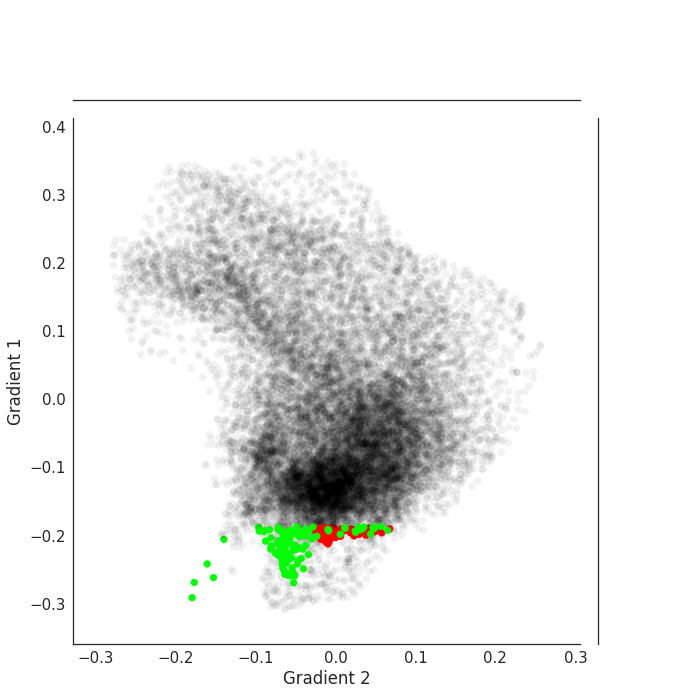

In [13]:
#res = nib.load('/om/project/UCT1/GRADIENTPROJECT/GRADIENT_PROJECT/python_notebooks_final/cerebellumgradient_initialfiles/result_cerebellumonly.dscalar.nii').get_data()
#res.shape = (8, 18142)
GRADIENT1 = nib.load('singles_result_cerebellumonly_gradient1_smooth4.dscalar.nii').get_data()
GRADIENT1 = GRADIENT1[0]
GRADIENT2 = nib.load('singles_result_cerebellumonly_gradient2_smooth4.dscalar.nii').get_data()
GRADIENT2 = GRADIENT2[0]
res_component1 = GRADIENT1
res_component2 = GRADIENT2

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res_component1)
df['e1'] = np.array(res_component2)

import matplotlib.cm as cm
sns.set_context(font_scale=2)
sns.set_style("ticks", {"xtick.major.size": 0.001, "ytick.major.size": 0.001})
g = (sns.jointplot('e0', 'e1', 
                   data=df,
                   size=10, label='big', linewidth=0, marker='.', alpha=0, color='w', # alpha=0.8,
                   ylim = [np.min(df['e0']) - 0.05, np.max(df['e0']) + 0.05], 
                   xlim=[np.min(df['e1']) - 0.05, np.max(df['e1']) + 0.05], 
                   stat_func=None).set_axis_labels('Gradient 2', 'Gradient 1'))
g.ax_joint.scatter(df.e1, df.e0, c=c)
g.savefig(os.path.abspath('/om/user/xaviergp/GRADIENT_PROJECT/gradient_data/figures_new/fig.components.scatterplot.component1and8_taskcolors_LANGrMOTbWMyEMOgSOCc.png'), format='png', dpi=600, transparent=False)
plt.show()